# 한글

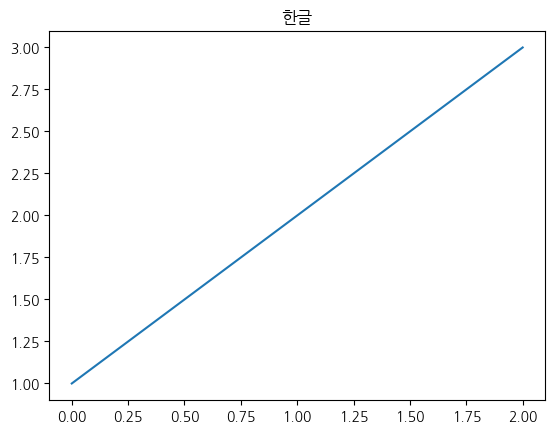

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

In [2]:
import pandas as pd

df1 = pd.read_excel('data/시설현황1.xlsx')

df1.head(3)

,호출부호,입항연도,입항횟수,이동,신고톤수,선박명,시설코드,시설번호,시설명,지정일시_S,지정일시_E,사용목적명
0,176801,2021,125,7,759.000,아크,WAM,4.0,정박지-M4,2022-01-01 01:25,2022-01-01 07:10,기타
1,130029,2022,2,1,549.000,유성호,WAE,3.0,정박지-E3,2022-01-02 09:20,2022-01-02 15:20,양하
2,3EWD3,2021,54,1,3.765,CRANE LUNA,WAE,1.0,정박지-E1,2021-12-30 14:35,2021-12-31 00:30,접안대기


In [3]:
df2 = pd.read_excel('data/시설현황2.xlsx')

df2.head(3)

,호출부호,입항연도,입항횟수,이동,신고톤수,선박명,시설코드,시설번호,시설명,지정일시_S,지정일시_E,사용목적명
0,3FJG3,2022,1,1,7.25,GOLDEN WAVE,WAB,11,벙커링전용정박지-B11,2022-01-26 08:00,2022-01-26 13:50,급유
1,134809,2022,10,5,699.00,창용호,MLJ,1,장생포호안,2022-01-28 04:30,2022-01-28 15:05,기타
2,3FJG3,2022,1,2,7.25,GOLDEN WAVE,WAE,1,정박지-E1,2022-01-26 18:35,2022-01-29 04:15,기타


In [4]:
df3 = pd.read_excel('data/시설현황3.xlsx')

df3.head(3)

,호출부호,입항연도,입항횟수,이동,신고톤수,선박명,시설코드,시설번호,시설명,지정일시_S,지정일시_E,사용목적명
0,210036,2022,22,1,1.994,경성,WAM,1,정박지-M1,2022-03-02 04:30,2022-03-02 08:30,접안대기
1,210036,2022,22,2,1.994,경성,MBU,1,SK2부두 01,2022-03-02 08:55,2022-03-02 20:20,적하
2,210036,2022,22,3,1.994,경성,WAM,7,정박지-M7,2022-03-02 20:45,2022-03-03 01:00,출항대기


In [5]:
result = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12975 entries, 0 to 12974
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   호출부호    12975 non-null  object 
 1   입항연도    12975 non-null  int64  
 2   입항횟수    12975 non-null  int64  
 3   이동      12975 non-null  int64  
 4   신고톤수    12975 non-null  float64
 5   선박명     12975 non-null  object 
 6   시설코드    12974 non-null  object 
 7   시설번호    12974 non-null  float64
 8   시설명     12974 non-null  object 
 9   지정일시_S  12974 non-null  object 
 10  지정일시_E  12974 non-null  object 
 11  사용목적명   12975 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.2+ MB


In [6]:
result[result.isnull().any(axis=1)]

,호출부호,입항연도,입항횟수,이동,신고톤수,선박명,시설코드,시설번호,시설명,지정일시_S,지정일시_E,사용목적명
1461,910728,2022,1,1,22.0,신동2호,NaN,NaN,NaN,NaN,NaN,기타


In [7]:
result_df = result.dropna(axis=0)
result_df.head(3)

,호출부호,입항연도,입항횟수,이동,신고톤수,선박명,시설코드,시설번호,시설명,지정일시_S,지정일시_E,사용목적명
0,176801,2021,125,7,759.000,아크,WAM,4.0,정박지-M4,2022-01-01 01:25,2022-01-01 07:10,기타
1,130029,2022,2,1,549.000,유성호,WAE,3.0,정박지-E3,2022-01-02 09:20,2022-01-02 15:20,양하
2,3EWD3,2021,54,1,3.765,CRANE LUNA,WAE,1.0,정박지-E1,2021-12-30 14:35,2021-12-31 00:30,접안대기


In [8]:
RDF = result_df[result_df['입항연도'] == 2022]
RDF.head(3)

,호출부호,입항연도,입항횟수,이동,신고톤수,선박명,시설코드,시설번호,시설명,지정일시_S,지정일시_E,사용목적명
1,130029,2022,2,1,549.000,유성호,WAE,3.0,정박지-E3,2022-01-02 09:20,2022-01-02 15:20,양하
4,160064,2022,1,1,2.458,제1은희호,MDU,5.0,SK5부두,2022-01-02 15:15,2022-01-03 01:30,적하
7,202809,2022,1,1,299.000,36한진호,MBN,12.0,현대오일터미널신항부두,2022-01-03 00:55,2022-01-03 02:45,적하


In [9]:
# 입항연도와 입항횟수를 고유값으로 만들어주는작업 필요 (고유값을 묶어주는 방법이 뭐가 있을까에 대한 의문으로 시작)

In [10]:
RDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12279 entries, 1 to 12974
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   호출부호    12279 non-null  object 
 1   입항연도    12279 non-null  int64  
 2   입항횟수    12279 non-null  int64  
 3   이동      12279 non-null  int64  
 4   신고톤수    12279 non-null  float64
 5   선박명     12279 non-null  object 
 6   시설코드    12279 non-null  object 
 7   시설번호    12279 non-null  float64
 8   시설명     12279 non-null  object 
 9   지정일시_S  12279 non-null  object 
 10  지정일시_E  12279 non-null  object 
 11  사용목적명   12279 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.2+ MB


In [11]:
# 입항식별자 칼럼 생성
RDF['입항식별자'] = RDF['입항연도'].astype(str) + RDF['입항횟수'].astype(str)

# 최종적으로 int 형식으로 변환
RDF['입항식별자'] = RDF['입항식별자'].astype(int)
RDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12279 entries, 1 to 12974
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   호출부호    12279 non-null  object 
 1   입항연도    12279 non-null  int64  
 2   입항횟수    12279 non-null  int64  
 3   이동      12279 non-null  int64  
 4   신고톤수    12279 non-null  float64
 5   선박명     12279 non-null  object 
 6   시설코드    12279 non-null  object 
 7   시설번호    12279 non-null  float64
 8   시설명     12279 non-null  object 
 9   지정일시_S  12279 non-null  object 
 10  지정일시_E  12279 non-null  object 
 11  사용목적명   12279 non-null  object 
 12  입항식별자   12279 non-null  int32  
dtypes: float64(2), int32(1), int64(3), object(7)
memory usage: 1.3+ MB


In [12]:
FRDF = RDF.drop(['입항연도', '입항횟수'], axis=1)

In [13]:
DF = pd.read_excel('data/입출항1-3.xlsx')

DF.head(10)

,호출부호,선명,입항연도,입항수,외내,입출,입항일시,출항일시,항해구분,선박용도
0,LAOP8,BLAAMANEN,2022,1,외항,입항,2022-03-27 11:30,2022-03-31 22:40,기타,석유제품 운반선
1,LAOP8,BLAAMANEN,2022,1,외항,출항,2022-03-27 11:30,2022-03-31 22:40,기타,석유제품 운반선
2,V7A4593,NISSOS KEA,2022,1,외항,입항,2022-03-31 00:00,2022-03-31 15:40,신조선,신조선
3,V7A4593,NISSOS KEA,2022,1,외항,출항,2022-03-31 00:00,2022-03-31 15:40,신조선,신조선
4,V7A4362,REDWOOD MARINER,2022,1,외항,입항,2022-03-27 08:00,2022-03-31 14:45,기타,석유제품 운반선
5,V7A4362,REDWOOD MARINER,2022,1,외항,출항,2022-03-27 08:00,2022-03-31 14:45,기타,석유제품 운반선
6,3ECG2,EVER EXPRESS,2022,1,외항,출항,2022-03-29 17:20,2022-03-31 14:30,기타,일반화물선
7,3ECG2,EVER EXPRESS,2022,1,외항,입항,2022-03-29 17:20,2022-03-31 14:30,기타,일반화물선
8,V7VD8,STI SAN TELMO,2022,1,외항,출항,2022-03-24 02:48,2022-03-31 14:10,기타,석유제품 운반선
9,V7VD8,STI SAN TELMO,2022,1,외항,입항,2022-03-24 02:48,2022-03-31 14:10,기타,석유제품 운반선


In [14]:
# 호출부호가 홀수인 애들 조짐(=입/출항이 두개 다 없는 애들)

In [15]:
DF['호출부호'].value_counts()

호출부호
DSEA2        100
200009        98
DSDJ6         92
176801        78
184803        78
180017        76
200013        72
090831        70
100611        68
130008        66
038256        66
192827        64
010511        64
210036        60
210016        60
091321        60
166802        60
190026        60
130060        60
130064        60
122801        58
038217        58
134809        58
DSAU950       56
040438        56
210043        56
170036        56
120025        56
114801        56
150074        56
076548        54
130093        54
210024        54
216804        54
185303        54
190008        54
960771        54
130037        50
200023        50
130001        50
DSNA3         48
180018        48
180029        48
200031        48
120068        48
194803        46
190027        46
200018        46
110047        46
120021        46
120064        46
122804        44
180016        44
DSHE550       44
130074        44
210020        44
150071        42
120059        42
091116   

In [16]:
DF2 = DF[DF['입출']== '출항']
DF2.head(5)
DF2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6146 entries, 1 to 12292
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   호출부호    6146 non-null   object
 1   선명      6146 non-null   object
 2   입항연도    6146 non-null   int64 
 3   입항수     6146 non-null   int64 
 4   외내      6146 non-null   object
 5   입출      6146 non-null   object
 6   입항일시    6146 non-null   object
 7   출항일시    6146 non-null   object
 8   항해구분    6146 non-null   object
 9   선박용도    6146 non-null   object
dtypes: int64(2), object(8)
memory usage: 528.2+ KB


In [17]:
#여기도 고유식별자를 만들어주도록 하자

In [18]:
# 입항식별자 칼럼 생성
DF2['입항식별자'] = DF2['입항연도'].astype(str) + DF2['입항수'].astype(str)

# 최종적으로 int 형식으로 변환
DF2['입항식별자'] = DF2['입항식별자'].astype(int)
DF2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6146 entries, 1 to 12292
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   호출부호    6146 non-null   object
 1   선명      6146 non-null   object
 2   입항연도    6146 non-null   int64 
 3   입항수     6146 non-null   int64 
 4   외내      6146 non-null   object
 5   입출      6146 non-null   object
 6   입항일시    6146 non-null   object
 7   출항일시    6146 non-null   object
 8   항해구분    6146 non-null   object
 9   선박용도    6146 non-null   object
 10  입항식별자   6146 non-null   int32 
dtypes: int32(1), int64(2), object(8)
memory usage: 552.2+ KB


In [19]:
FDF2 = DF2.drop(['입항연도', '입항수'], axis=1)

In [20]:
# merge 전에 확인

In [24]:
print(FRDF.head(5))
print('-------------')
print(FDF2.head(5))

      호출부호  이동     신고톤수    선박명 시설코드  시설번호          시설명            지정일시_S  \
1   130029   1  549.000    유성호  WAE   3.0       정박지-E3  2022-01-02 09:20   
4   160064   1    2.458  제1은희호  MDU   5.0        SK5부두  2022-01-02 15:15   
7   202809   1  299.000  36한진호  MBN  12.0  현대오일터미널신항부두  2022-01-03 00:55   
9   200043   1  299.000   극동3호  MBN  12.0  현대오일터미널신항부두  2022-01-02 13:20   
10  090831   1  749.000     신영  WAM   6.0       정박지-M6  2022-01-01 20:30   

              지정일시_E 사용목적명  입항식별자  
1   2022-01-02 15:20    양하  20222  
4   2022-01-03 01:30    적하  20221  
7   2022-01-03 02:45    적하  20221  
9   2022-01-02 16:35    기타  20221  
10  2022-01-01 22:35    기타  20221  
-------------
      호출부호               선명  외내  입출              입항일시              출항일시 항해구분  \
1    LAOP8        BLAAMANEN  외항  출항  2022-03-27 11:30  2022-03-31 22:40   기타   
3  V7A4593       NISSOS KEA  외항  출항  2022-03-31 00:00  2022-03-31 15:40  신조선   
5  V7A4362  REDWOOD MARINER  외항  출항  2022-03-27 08:00  2022-03-31 14:45  

In [33]:
merged_df = pd.merge(FRDF, FDF2, on=['호출부호', '입항식별자'], how='left')
merged_df.head(3)
# merged_df.info()

,호출부호,이동,신고톤수,선박명,시설코드,시설번호,시설명,지정일시_S,지정일시_E,사용목적명,입항식별자,선명,외내,입출,입항일시,출항일시,항해구분,선박용도
0,130029,1,549.000,유성호,WAE,3.0,정박지-E3,2022-01-02 09:20,2022-01-02 15:20,양하,20222,유성호,내항,출항,2022-01-02 09:20,2022-01-02 15:20,기타,석유제품 운반선
1,160064,1,2.458,제1은희호,MDU,5.0,SK5부두,2022-01-02 15:15,2022-01-03 01:30,적하,20221,제1은희호,내항,출항,2022-01-02 15:15,2022-01-03 01:30,기타,기타 유조선
2,202809,1,299.000,36한진호,MBN,12.0,현대오일터미널신항부두,2022-01-03 00:55,2022-01-03 02:45,적하,20221,36한진호,내항,출항,2022-01-03 00:55,2022-01-03 02:45,기타,기타 유조선


In [32]:
MD = pd.merge(FRDF, FDF2, on=['호출부호', '입항식별자'], how='right')
MD.head(3)
# MD.info()

,호출부호,이동,신고톤수,선박명,시설코드,시설번호,시설명,지정일시_S,지정일시_E,사용목적명,입항식별자,선명,외내,입출,입항일시,출항일시,항해구분,선박용도
0,LAOP8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20221,BLAAMANEN,외항,출항,2022-03-27 11:30,2022-03-31 22:40,기타,석유제품 운반선
1,V7A4593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20221,NISSOS KEA,외항,출항,2022-03-31 00:00,2022-03-31 15:40,신조선,신조선
2,V7A4362,1.0,29.649,REDWOOD MARINER,WAB,21.0,벙커링전용정박지-B21,2022-03-27 08:00,2022-03-28 08:00,접안대기,20221,REDWOOD MARINER,외항,출항,2022-03-27 08:00,2022-03-31 14:45,기타,석유제품 운반선


In [39]:
MD.to_csv('입출항.csv', encoding = 'utf-8-sig', index=False)